In [1]:
from qiskit import QuantumCircuit, assemble, Aer
from math import pi, sqrt
from qiskit.visualization import plot_bloch_multivector, plot_histogram
sim = Aer.get_backend('aer_simulator')

In [2]:
qc = QuantumCircuit(1)
qc.x(0) #X gate(NAND) on first qubit
qc.draw()

┌───┐
q: ┤ X ├
   └───┘

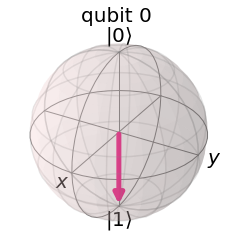

In [3]:
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)

In [4]:
#Think of X-Gate as rotation of pi radians about X-axis
#Similar for Y and Z Gates
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [5]:
gate_demo(gates='pauli+h')
#Hadamard Gate => From Z basis to X basis (|0> => |+>)

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [6]:
def x_measurement(qc, qubit, cbit):
    """Measure 'qubit' in the X-basis, and store the result in 'cbit'"""
    qc.h(qubit)
    qc.measure(qubit, cbit)
    return qc

initial_state = [1/sqrt(2), -1/sqrt(2)] # |-> State
# Initialize our qubit and measure it
qc = QuantumCircuit(1,1)
qc.initialize(initial_state, 0)
x_measurement(qc, 0, 0)  # measure qubit 0 to classical bit 0
qc.draw()

┌──────────────────────────────┐┌───┐┌─┐
  q: ┤ Initialize(0.70711,-0.70711) ├┤ H ├┤M├
     └──────────────────────────────┘└───┘└╥┘
c: 1/══════════════════════════════════════╩═
                                           0

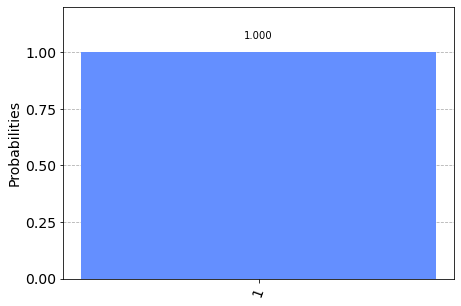

In [7]:
qobj = assemble(qc)  # Assemble circuit into a Qobj that can be run
counts = sim.run(qobj).result().get_counts()  # Do the simulation, returning the state vector
plot_histogram(counts)  # Display the output on measurement of state vector

In [8]:
q_new = QuantumCircuit(1, 1)
q_new.initialize(initial_state, 0)
q_new.measure(0, 0)
q_new.draw()

┌──────────────────────────────┐┌─┐
  q: ┤ Initialize(0.70711,-0.70711) ├┤M├
     └──────────────────────────────┘└╥┘
c: 1/═════════════════════════════════╩═
                                      0

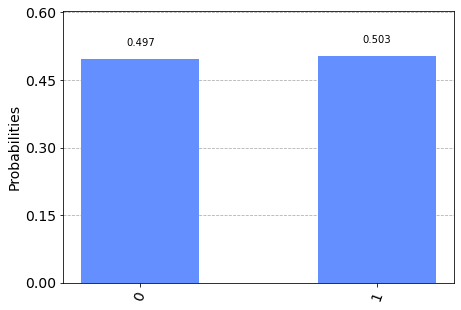

In [9]:
qobj = assemble(q_new)
result = sim.run(qobj).result()
plot_histogram(result.get_counts())

### P Gate:

P(phi) => Rotation of phi along z-axis

In [10]:
from qiskit_textbook.widgets import gate_demo
gate_demo(gates='pauli+h+p')

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x01 \x00\x00\x01 \x08\x06\x00\x00\x00\x14\x83\xae\x8…

In [11]:
qc = QuantumCircuit(1)
qc.p(pi/4, 0)
qc.draw()

┌────────┐
q: ┤ P(π/4) ├
   └────────┘

### I Gate

Doesn't change State of Qubit

### S Gate

Rotation by pi/2 along z-axis, also known as sqrt(Z) gate.

In [12]:
qc = QuantumCircuit(1)
qc.s(0)   # Apply S-gate to qubit 0
qc.sdg(0) # Apply Sdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q: ┤ S ├┤ Sdg ├
   └───┘└─────┘

### T Gate

P(pi/4)

In [13]:
qc = QuantumCircuit(1)
qc.t(0)   # Apply T-gate to qubit 0
qc.tdg(0) # Apply Tdg-gate to qubit 0
qc.draw()

┌───┐┌─────┐
q: ┤ T ├┤ Tdg ├
   └───┘└─────┘

### U Gate:

General gate parametrised by three angles

In [14]:
qc = QuantumCircuit(1)
qc.u(pi/2, 0, pi, 0)
qc.draw()

┌────────────┐
q: ┤ U(π/2,0,π) ├
   └────────────┘

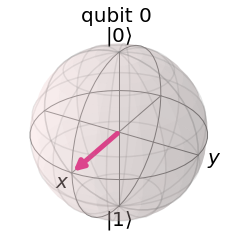

In [15]:
# Let's see the result
qc.save_statevector()
qobj = assemble(qc)
state = sim.run(qobj).result().get_statevector()
plot_bloch_multivector(state)